In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Read data

In [2]:
start_date = np.datetime64('2016-08-01')
end_date = np.datetime64('2017-05-01')
    
#helper function
def read_and_trim(file_path):
    # read file into dataframe
    df = pd.read_csv(file_path,header=0, index_col=0, skiprows=[0,2,3], na_values="NAN")
    
    # convert time column entries to datetime objects    
    df.index = pd.to_datetime(df.index)
    
    # find start and end dates
    for i, date in enumerate(df.index):
        if date == start_date:
            start_index = i
        if date == end_date:
            end_index = i

    return df[start_index:end_index]

In [3]:
file_ADV = 'Adventdalen_Hour.dat'
file_GF = "Gruvefjellet_Res_data.dat"

ADV_data = read_and_trim(file_ADV)
GF_data = read_and_trim(file_GF)

# resample data to get daily averages
ADV_daily = ADV_data.resample('D').mean()
GF_daily = GF_data.resample('D').mean()

# Plotting

In [4]:
ADV_temp = ADV_daily["LT1_gr_C_Avg"]
GF_temp = GF_daily["LT3m_minutt_Avg"]

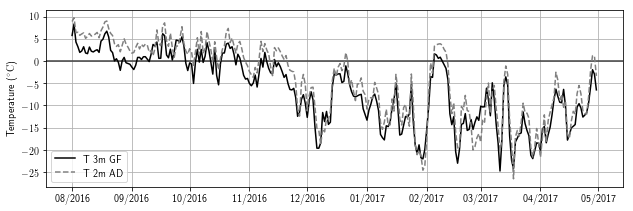

In [13]:
file_name = "temp"

fig, ax = plt.subplots(figsize=(9, 3.0))
fig.subplots_adjust(left=.08, bottom=.15, right=.97, top=.97)
ax.grid()
line1 = plt.plot(GF_temp, color="k", ls="solid", label="T 3m GF", zorder=3)
line2 = plt.plot(ADV_temp, color=".5", ls="dashed", label="T 2m AD", zorder=4)
plt.legend(loc="lower left")
zeroline = plt.axhline(0, color=".25")
zeroline.set_zorder(2)

tickdates = pd.date_range(start_date, end_date+31, freq="M")
xticks = ['%02d/%d' %(date.month, date.year) for date in tickdates]
ax.set_xticklabels(xticks)

ax.set_ylabel("Temperature ($^\circ \\mathrm{C}$)")
fig.savefig("plots/%s.eps" % file_name)
fig.savefig("plots/%s.png" % file_name, dpi=200)

In [17]:
def get_gradient_df(gf, adv):    
    
    graddata = {"Gradient": (gf["LT3m_minutt_Avg"].values-adv["LT1_gr_C_Avg"].values)/(4.64-0.15) }
    grad = pd.DataFrame(data=graddata)
    grad.index = adv.index
    return grad

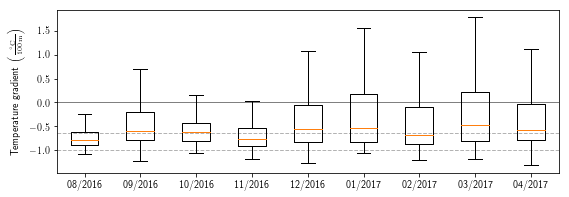

In [22]:
file_name = "tempGradient"

gradlist = list(get_gradient_df(GF_data, ADV_data).groupby(pd.Grouper(freq="M")))
gradvals = [gradlist[i][1].values for i in range(len(gradlist)) ]

ticks = [ "%02d/%d" % (gradlist[i][0].date().month, gradlist[i][0].date().year) for i in range(len(gradlist))]

fig= plt.figure(figsize=(9,3))
ax = fig.gca()
ax.boxplot(gradvals, 0, '')
zeroline = plt.axhline(0, color="0.5", zorder=0, linewidth =1.0)
moistadiabatline = plt.axhline(-0.65, color="0.7", zorder=0, linewidth =1.0, linestyle = "dashed")
dryadiabatline = plt.axhline(-1, color="0.7", zorder=0, linewidth =1.0, linestyle = "dashed")
ax.set_xticklabels(ticks)
ax.set_ylabel("Temperature gradient $\\left( \\frac{^\circ \\mathrm{C}}{100 \\> \\mathrm{m}} \\right)$ ")



fig.savefig("plots/%s.eps" % file_name)
fig.savefig("plots/%s.png" % file_name, dpi=200)